In [25]:
import numpy as np
import matplotlib.pyplot as plt

In [21]:
import tensorflow as tf
from tensorflow import keras

In [10]:
!pip install h5py

In [22]:
import h5py
import keras.models as models

In [32]:
f = h5py.File('kaggle_diabetic_retinopathy_model.h5', 'r')

list(f.keys())


['model_weights', 'optimizer_weights']

In [14]:
dataset = f['model_weights']
dataset

<HDF5 group "/model_weights" (11 members)>

In [33]:
for nome_membro in dataset.keys():
  print(f"Membro: {nome_membro}")

Membro: conv2d
Membro: conv2d_1
Membro: conv2d_2
Membro: dense
Membro: dense_1
Membro: dropout
Membro: flatten
Membro: max_pooling2d
Membro: max_pooling2d_1
Membro: max_pooling2d_2
Membro: top_level_model_weights


In [34]:
# Acessar valores de um dataset
nome_dataset = "conv2d"  # Exemplo de nome
valores_dataset = dataset[nome_dataset]
print(f"Valores do Dataset {nome_dataset}:")
print(valores_dataset)

Valores do Dataset conv2d:
<HDF5 group "/model_weights/conv2d" (1 members)>


In [35]:
for nome_membro in valores_dataset.keys():
    print(f"Membro: {nome_membro}")

Membro: sequential


In [37]:
datasetnome_conv2 = "sequential"
valores = valores_dataset[datasetnome_conv2]
print(f"Valores do Dataset {datasetnome_conv2}:")
print(valores)

Valores do Dataset sequential:
<HDF5 group "/model_weights/conv2d/sequential" (1 members)>


In [38]:
for nome_membro in valores.keys():
    print(f"Membro: {nome_membro}")

Membro: conv2d


In [39]:
datasetnome_seq = "conv2d"
valores1 = valores[datasetnome_seq]
print(f"Valores do Dataset {datasetnome_seq}:")
print(valores1)

Valores do Dataset conv2d:
<HDF5 group "/model_weights/conv2d/sequential/conv2d" (2 members)>


In [40]:
for nome_membro in valores1.keys():
    print(f"Membro: {nome_membro}")

Membro: bias
Membro: kernel


In [81]:
subgrupo_conv2d = dataset['conv2d/sequential/conv2d']

In [82]:
pesos_conv2d = subgrupo_conv2d['kernel']
print(f"Forma dos Pesos Conv2D: {pesos_conv2d.shape}")


Forma dos Pesos Conv2D: (3, 3, 3, 32)


In [83]:
vieses_conv2d = subgrupo_conv2d['bias']
print(f"Forma dos Vieses Conv2D: {vieses_conv2d.shape}")


Forma dos Vieses Conv2D: (32,)


In [84]:
# Analisar pesos
print(f"Estatísticas dos Pesos Conv2D:")
print(f"Média: {np.mean(pesos_conv2d)}")
print(f"Mediana: {np.median(pesos_conv2d)}")
print(f"Desvio Padrão: {np.std(pesos_conv2d)}")
print(f"Mínimo: {np.min(pesos_conv2d)}")
print(f"Máximo: {np.max(pesos_conv2d)}")

# Visualizar distribuição dos pesos (histograma)
# plt.hist(pesos_conv2d.flatten())
# plt.xlabel('Valor do Peso')
# plt.ylabel('Frequência')
# plt.title('Distribuição de Pesos Conv2D')
# plt.show()

# Analisar vieses
print(f"\nEstatísticas dos Vieses Conv2D:")
print(f"Média: {np.mean(vieses_conv2d)}")
print(f"Mediana: {np.median(vieses_conv2d)}")
print(f"Desvio Padrão: {np.std(vieses_conv2d)}")
print(f"Mínimo: {np.min(vieses_conv2d)}")
print(f"Máximo: {np.max(vieses_conv2d)}")

# ... (visualizar distribuição dos vieses, correlações etc.)


Estatísticas dos Pesos Conv2D:
Média: 0.00204795622266829
Mediana: 0.000927204207982868
Desvio Padrão: 0.07585690915584564
Mínimo: -0.14331014454364777
Máximo: 0.14398126304149628

Estatísticas dos Vieses Conv2D:
Média: 0.0020118304528295994
Mediana: 0.005988964810967445
Desvio Padrão: 0.0057912711054086685
Mínimo: -0.006106138229370117
Máximo: 0.008555849082767963


In [85]:
type(pesos_conv2d)

h5py._hl.dataset.Dataset

In [86]:
import pandas as pd

df_vieses = pd.DataFrame(vieses_conv2d)

df_vieses.to_csv('vieses_conv2d.csv', index=False)

dados_vieses = pd.read_csv('vieses_conv2d.csv')
dados_vieses = dados_vieses.to_numpy()

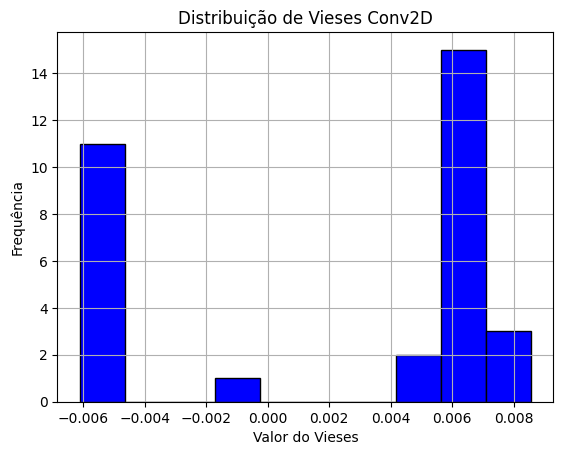

In [87]:

# Criar figura e eixo
fig, ax = plt.subplots()

# Plotar histograma
ax.hist(dados_vieses.flatten(), color='blue', edgecolor='k')  # Personalizar cores

# Personalizar aparência do gráfico
ax.set_title('Distribuição de Vieses Conv2D')
ax.set_xlabel('Valor do Vieses')
ax.set_ylabel('Frequência')
ax.grid(True)

# Exibir o gráfico
plt.show()

In [88]:
import tensorflow as tf

# Converter Dataset para tensor TensorFlow
tensor_pesos = tf.convert_to_tensor(pesos_conv2d)

# Visualizar o tensor
array_pesos = tensor_pesos.numpy()

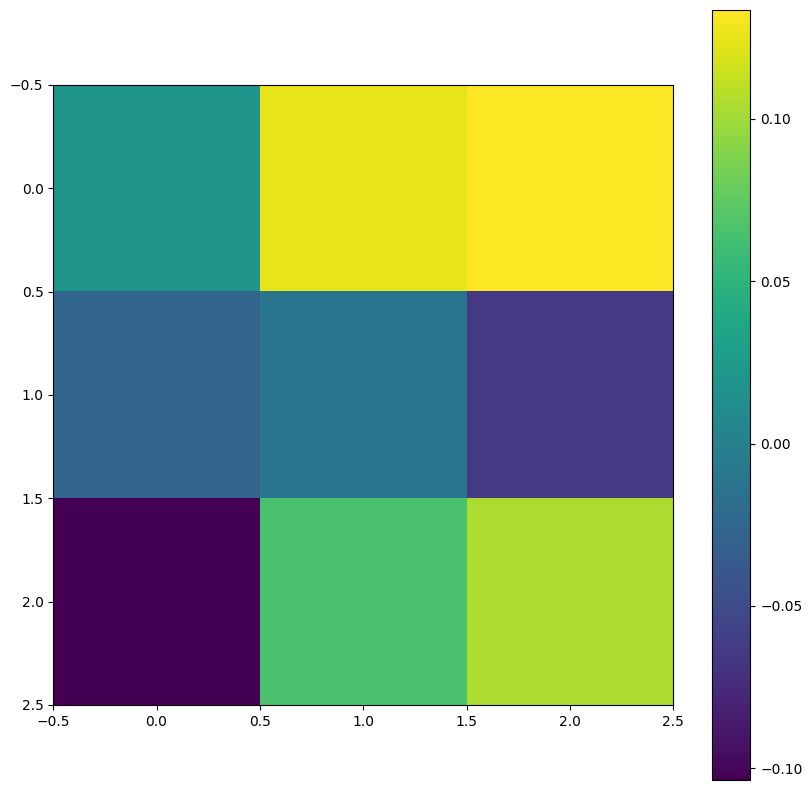

In [89]:
# Criar mapa de calor
plt.figure(figsize=(10, 10))
plt.imshow(array_pesos[0, :, :, 0], cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.show()